# Data Analysis Project Life Cycle
- **Business Problem Understanding**
- **Data Collection**
- **Data Pre-processing**
- **Exploratory Data Analysis**
- **Reporting**

## Business Problem
**Client wants us to analyze diwali sales data in order to understand the trend, insights, top performing products, categories, zones so that they can prepare better to improve sales**

## Data Collection
- Client has provided historial data in csv file
- Link: https://drive.google.com/file/d/1mGY1doT8RRTgIS0eZsiexHOjUIel9pvo/view?usp=drive_link

In [85]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
data=pd.read_csv("C:\\Users\\abirm\\Downloads\Diwali Sales Data.csv",encoding="unicode_escape")
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903.0,Sanskriti,P00125942,F,26-35,28,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952,NaN,NaN
1,1000732.0,Kartik,P00110942,F,26-35,35,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934,NaN,NaN
2,1001990.0,Bindu,P00118542,F,26-35,35,1.0,Uttar Pradesh,Central,Automobile,Auto,3.0,23924,NaN,NaN
3,1001425.0,Sudevi,P00237842,M,0-17,16,0.0,Karnataka,Southern,Construction,Auto,2.0,23912,NaN,NaN
4,1000588.0,Joni,P00057942,M,26-35,28,1.0,Gujarat,Western,Food Processing,Auto,2.0,23877,NaN,NaN


In [98]:
# Creating a copy of the dataset
df = data.copy()

## Data Pre-processing
- **Data Profiling**
- **Data Cleaning**
- **Data Consistancy**
- **Data Formating**
- **Outlier Detection & Removal**

In [100]:
df.shape

(11345, 15)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11345 entries, 0 to 11344
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11321 non-null  float64
 1   Cust_name         11344 non-null  object 
 2   Product_ID        11341 non-null  object 
 3   Gender            11341 non-null  object 
 4   Age Group         11339 non-null  object 
 5   Age               11334 non-null  object 
 6   Marital_Status    11339 non-null  float64
 7   State             11332 non-null  object 
 8   Zone              11334 non-null  object 
 9   Occupation        11339 non-null  object 
 10  Product_Category  11334 non-null  object 
 11  Orders            11342 non-null  float64
 12  Amount            11331 non-null  object 
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(5), object(10)
memory usage: 1.3+ MB


In [104]:
# Null values
df.isna().sum()

User_ID                24
Cust_name               1
Product_ID              4
Gender                  4
Age Group               6
Age                    11
Marital_Status          6
State                  13
Zone                   11
Occupation              6
Product_Category       11
Orders                  3
Amount                 14
Status              11345
unnamed1            11345
dtype: int64

In [106]:
# All columns
all_columns = df.columns
all_columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [108]:
# Numeric columns
numeric_columns = df.select_dtypes(include = np.number).columns
numeric_columns

Index(['User_ID', 'Marital_Status', 'Orders', 'Status', 'unnamed1'], dtype='object')

In [110]:
# Non-Numeric columns
non_numeric_columns = df.select_dtypes(include = object).columns
non_numeric_columns

Index(['Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age', 'State',
       'Zone', 'Occupation', 'Product_Category', 'Amount'],
      dtype='object')

In [112]:
# Duplicate values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11340    False
11341    False
11342    False
11343     True
11344    False
Length: 11345, dtype: bool

In [114]:
# Filtering out the duplicate entries
df = df[~df.duplicated()]
df[df.duplicated()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1


### Data Profiling
1. **Amount**
    - Need to change the data type from object to integer
    - The rows corresponding to null values should be dropped
    - Need to drop the rows corresponding to values 'abcds'
    
2. **Status & unnamed1**
    - No data, should be dropped

3. **Orders**
    - Null values has to be dropped
    - Theres is outliers which can be removed

4. **State**
    - Andhra\xa0Pradesh & Nndhra\xa0Pradesh should be replaced with 'Andhra Pradesh'
    - Drop the rows corresponding to null values

5. **Zone**
    - Drop the rows corresponding to null values
    - 'Zentral' should be replaced with 'Central

6. **Product_ID**
    - Drop the rows corresponding to null values

7. **Marital_Status**
    - Null values can be replaced with mode
    - Will create a new column where '1' can be replaced with 'Married' and '0' with unmarried
8. **Age**
    - 'Age' can be replaced with mode
    - Null values can be replaced with mode
    - Data type needs to be changed from object to numeric
9. **Age Group**
    - 'low-high' can be replaced with mode
    - Null values can be replaced with mode
    
10. **Product_Category**
    - Null values can be dropped

11. **User_ID, Gender, Occupation**
    - Null values can be replaced with mod

### Data Cleaning

#### Status & unnamed1

In [116]:
# Dropping columns
df.drop(['Status', 'unnamed1'],axis =1, inplace = True)
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903.0,Sanskriti,P00125942,F,26-35,28,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952
1,1000732.0,Kartik,P00110942,F,26-35,35,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934


### Amount

In [118]:
# Changing the data type
df['Amount'] = pd.to_numeric(df['Amount'], errors = 'coerce') 
# errors = coerce will convert unsupported values into null values

In [120]:
# Dropping rows corresponding to null values in the columns : 
#['Amount', 'Orders', 'State', 'Zone', 'Product_ID', 'Product_Category']
df.dropna(subset = ['Amount', 'Orders', 'State', 'Zone', 'Product_ID', 'Product_Category'], inplace = True)

### State & Zone

In [122]:
# Replacing the typo
df['State'] = df['State'].str.replace('Andhra\xa0Pradesh',  'Andhra Pradesh')
df['State'] = df['State'].str.replace('Nndhra\xa0Pradesh',  'Andhra Pradesh')
df['Zone'] = df['Zone'].str.replace('Zentral',  'Central')

In [124]:
df['Zone'].unique()

array(['Western', 'Southern', 'Central', 'Northern', 'Eastern'],
      dtype=object)

In [126]:
df['State'].unique()

array(['Maharashtra', 'Andhra Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Jharkhand', 'Kerala',
       'Madhya Pradesh', 'Bihar', 'Rajasthan', 'Haryana', 'Uttarakhand',
       'Telangana', 'Punjab'], dtype=object)

### Product id & Category already clean

### Maritial Status

In [128]:
# Replacing the null values with mode
marital_status_mode = df['Marital_Status'].mode()[0]
marital_status_mode

df['Marital_Status'] = df['Marital_Status'].fillna(marital_status_mode)


In [130]:
# Creating a new column with marital_status
df['marraige_status'] = df['Marital_Status'].apply(lambda x: 'Married' if(x ==1.) else 'Unmarried')

In [132]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,marraige_status
0,1002903.0,Sanskriti,P00125942,F,26-35,28,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952.0,Unmarried
1,1000732.0,Kartik,P00110942,F,26-35,35,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934.0,Married


In [134]:
df.drop(["Marital_Status"],axis=1,inplace=True)
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,State,Zone,Occupation,Product_Category,Orders,Amount,marraige_status
0,1002903.0,Sanskriti,P00125942,F,26-35,28,Maharashtra,Western,Healthcare,Auto,1.0,23952.0,Unmarried
1,1000732.0,Kartik,P00110942,F,26-35,35,Andhra Pradesh,Southern,Govt,Auto,3.0,23934.0,Married


In [136]:
df.isnull().sum()

User_ID             23
Cust_name            0
Product_ID           0
Gender               2
Age Group            5
Age                  9
State                0
Zone                 0
Occupation           5
Product_Category     0
Orders               0
Amount               0
marraige_status      0
dtype: int64

### Age

In [138]:
# Changing the data type from object to numeric
df['Age'] = pd.to_numeric(df['Age'], errors = 'coerce') 

In [140]:
# Replace the null values with mode
age_mode = df['Age'].mode()[0]
df['Age'] = df['Age'].fillna(age_mode)

### Age Group

In [142]:
# Replacing null value and typo with mode
age_group_mode = df['Age Group'].mode()[0]
age_group_mode
df['Age Group'] = df['Age Group'].str.replace('low-high', age_group_mode)
df['Age Group'] = df['Age Group'].fillna(age_group_mode)

### User id,Gender,Occupation

In [144]:
# Replacing null values with mode
gender_mode = df['Gender'].mode()[0]
occupation_mode = df['Occupation'].mode()[0]

df['Gender'] = df['Gender'].fillna(gender_mode)
df['Occupation'] = df['Occupation'].fillna(occupation_mode)

user_id_mode = df['User_ID'].mode()[0]
df['User_ID'] = df['User_ID'].fillna(user_id_mode)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11254 entries, 0 to 11340
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11254 non-null  float64
 1   Cust_name         11254 non-null  object 
 2   Product_ID        11254 non-null  object 
 3   Gender            11254 non-null  object 
 4   Age Group         11254 non-null  object 
 5   Age               11254 non-null  float64
 6   State             11254 non-null  object 
 7   Zone              11254 non-null  object 
 8   Occupation        11254 non-null  object 
 9   Product_Category  11254 non-null  object 
 10  Orders            11254 non-null  float64
 11  Amount            11254 non-null  float64
 12  marraige_status   11254 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.2+ MB


In [148]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
marraige_status     0
dtype: int64

In [150]:
df.head(4)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,State,Zone,Occupation,Product_Category,Orders,Amount,marraige_status
0,1002903.0,Sanskriti,P00125942,F,26-35,28.0,Maharashtra,Western,Healthcare,Auto,1.0,23952.0,Unmarried
1,1000732.0,Kartik,P00110942,F,26-35,35.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934.0,Married
2,1001990.0,Bindu,P00118542,F,26-35,35.0,Uttar Pradesh,Central,Automobile,Auto,3.0,23924.0,Married
3,1001425.0,Sudevi,P00237842,M,0-17,16.0,Karnataka,Southern,Construction,Auto,2.0,23912.0,Unmarried


In [152]:
df.shape

(11254, 13)

In [154]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,State,Zone,Occupation,Product_Category,Orders,Amount,marraige_status
0,1002903.0,Sanskriti,P00125942,F,26-35,28.0,Maharashtra,Western,Healthcare,Auto,1.0,23952.0,Unmarried
1,1000732.0,Kartik,P00110942,F,26-35,35.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934.0,Married
2,1001990.0,Bindu,P00118542,F,26-35,35.0,Uttar Pradesh,Central,Automobile,Auto,3.0,23924.0,Married
3,1001425.0,Sudevi,P00237842,M,0-17,16.0,Karnataka,Southern,Construction,Auto,2.0,23912.0,Unmarried
4,1000588.0,Joni,P00057942,M,26-35,28.0,Gujarat,Western,Food Processing,Auto,2.0,23877.0,Married


In [156]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
marraige_status     0
dtype: int64

### All data are Clean Now..!!

### **Outlier Detection & Removal**

In [158]:
df.describe()

,User_ID,Age,Orders,Amount
count,1.125400e+04,11254.000000,11254.000000,1.125400e+04
mean,1.013664e+06,35.424382,2.494135,1.916697e+05
std,3.263686e+05,12.753259,1.186925,1.072906e+07
min,1.000001e+06,12.000000,1.000000,1.880000e+02
25%,1.001496e+06,27.000000,2.000000,5.445000e+03
50%,1.003064e+06,33.000000,2.000000,8.113000e+03
75%,1.004430e+06,43.000000,3.000000,1.269900e+04
max,1.100505e+07,92.000000,40.000000,8.760212e+08


Text(0.5, 1.0, "Box plot for 'Amount'")

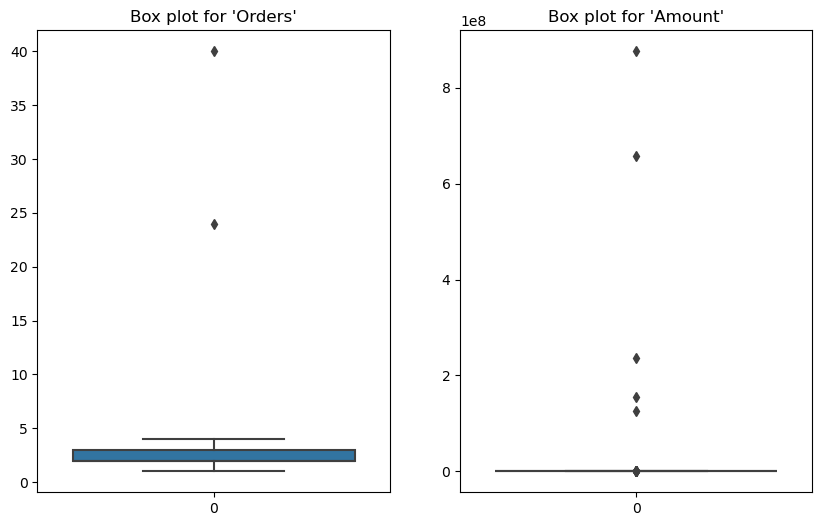

In [160]:
# Visulaization of outliers
fig,ax = plt.subplots(1,2, figsize = (10,6))
sns.boxplot(data = df['Orders'], ax = ax[0])
ax[0].set_title("Box plot for 'Orders'")

sns.boxplot(data = df['Amount'], ax = ax[1])
ax[1].set_title("Box plot for 'Amount'")

### Order

In [162]:
# Quartile
Q1_order = np.quantile(df['Orders'], 0.25)
Q3_order = np.quantile(df['Orders'], 0.75)
IQR_order = Q3_order - Q1_order
#IQR_order
lower_limit_order = Q1_order - 1.5*IQR_order
upper_limit_order = Q3_order + 1.5*IQR_order

In [164]:
# Removing the outliers
df = df[(df['Orders'] > lower_limit_order) & (df['Orders'] < upper_limit_order)]

### Amount

In [166]:
# Quartile
Q1_amount = np.quantile(df['Amount'], 0.25)
Q3_amount = np.quantile(df['Amount'], 0.75)
IQR_amount = Q3_amount - Q1_amount
#IQR_order
lower_limit_amount = Q1_amount - 1.5*IQR_amount
upper_limit_amount = Q3_amount + 1.5*IQR_amount

print(lower_limit_amount)
print(upper_limit_amount)

-5436.625
23580.375


In [168]:
# Removing the outliers
df = df[(df['Amount'] > lower_limit_amount) & (df['Amount'] < upper_limit_amount)]

In [170]:
df.describe()

,User_ID,Age,Orders,Amount
count,1.123400e+04,11234.000000,11234.000000,11234.000000
mean,1.007453e+06,35.433772,2.489496,9452.764638
std,2.109026e+05,12.759432,1.114845,5213.784648
min,1.000001e+06,12.000000,1.000000,188.000000
25%,1.001496e+06,27.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,2.000000,8109.500000
75%,1.004429e+06,43.000000,3.000000,12681.500000
max,1.100173e+07,92.000000,4.000000,23568.000000


In [174]:
# Saving the cleaned data
df.to_csv(r"C:\\Users\\abirm\\Downloads\Data_Analysis_Project_1.csv")
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903.0,Sanskriti,P00125942,F,26-35,28,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952,NaN,NaN
1,1000732.0,Kartik,P00110942,F,26-35,35,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934,NaN,NaN
2,1001990.0,Bindu,P00118542,F,26-35,35,1.0,Uttar Pradesh,Central,Automobile,Auto,3.0,23924,NaN,NaN
3,1001425.0,Sudevi,P00237842,M,0-17,16,0.0,Karnataka,Southern,Construction,Auto,2.0,23912,NaN,NaN
4,1000588.0,Joni,P00057942,M,26-35,28,1.0,Gujarat,Western,Food Processing,Auto,2.0,23877,NaN,NaN


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11234 entries, 18 to 11333
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11234 non-null  float64
 1   Cust_name         11234 non-null  object 
 2   Product_ID        11234 non-null  object 
 3   Gender            11234 non-null  object 
 4   Age Group         11234 non-null  object 
 5   Age               11234 non-null  float64
 6   State             11234 non-null  object 
 7   Zone              11234 non-null  object 
 8   Occupation        11234 non-null  object 
 9   Product_Category  11234 non-null  object 
 10  Orders            11234 non-null  float64
 11  Amount            11234 non-null  float64
 12  marraige_status   11234 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.2+ MB


### **Data Analysis**

### Statistical Analysis

In [178]:
df.describe()

,User_ID,Age,Orders,Amount
count,1.123400e+04,11234.000000,11234.000000,11234.000000
mean,1.007453e+06,35.433772,2.489496,9452.764638
std,2.109026e+05,12.759432,1.114845,5213.784648
min,1.000001e+06,12.000000,1.000000,188.000000
25%,1.001496e+06,27.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,2.000000,8109.500000
75%,1.004429e+06,43.000000,3.000000,12681.500000
max,1.100173e+07,92.000000,4.000000,23568.000000


In [180]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,State,Zone,Occupation,Product_Category,Orders,Amount,marraige_status
18,1001883.0,Praneet,P00029842,M,26-35,54.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married
19,1001883.0,Praneet,P00029842,M,26-35,54.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married
20,1000113.0,Ellis,P00180642,F,26-35,19.0,Andhra Pradesh,Southern,Govt,Auto,4.0,23546.0,Married
21,1000416.0,Hrisheekesh,P00181842,F,26-35,46.0,Uttar Pradesh,Central,Banking,Auto,2.0,23525.0,Married
22,1005256.0,Grant,P00101742,F,26-35,30.0,Andhra Pradesh,Southern,IT Sector,Auto,1.0,23518.0,Unmarried


### **Data Visualization**

### Gender Wise

In [182]:
#Plot data
data_gender_count = df.groupby(['Gender'], as_index = False)['Orders'].count()
print("Gender wise order count \n", data_gender_count)

data_gender_amount = df.groupby(['Gender'], as_index = False)['Amount'].sum()
print("Gender wise Purchase Power \n", data_gender_amount)

Gender wise order count 
   Gender  Orders
0      F    7835
1      M    3399
Gender wise Purchase Power 
   Gender       Amount
0      F  74422989.94
1      M  31769368.00


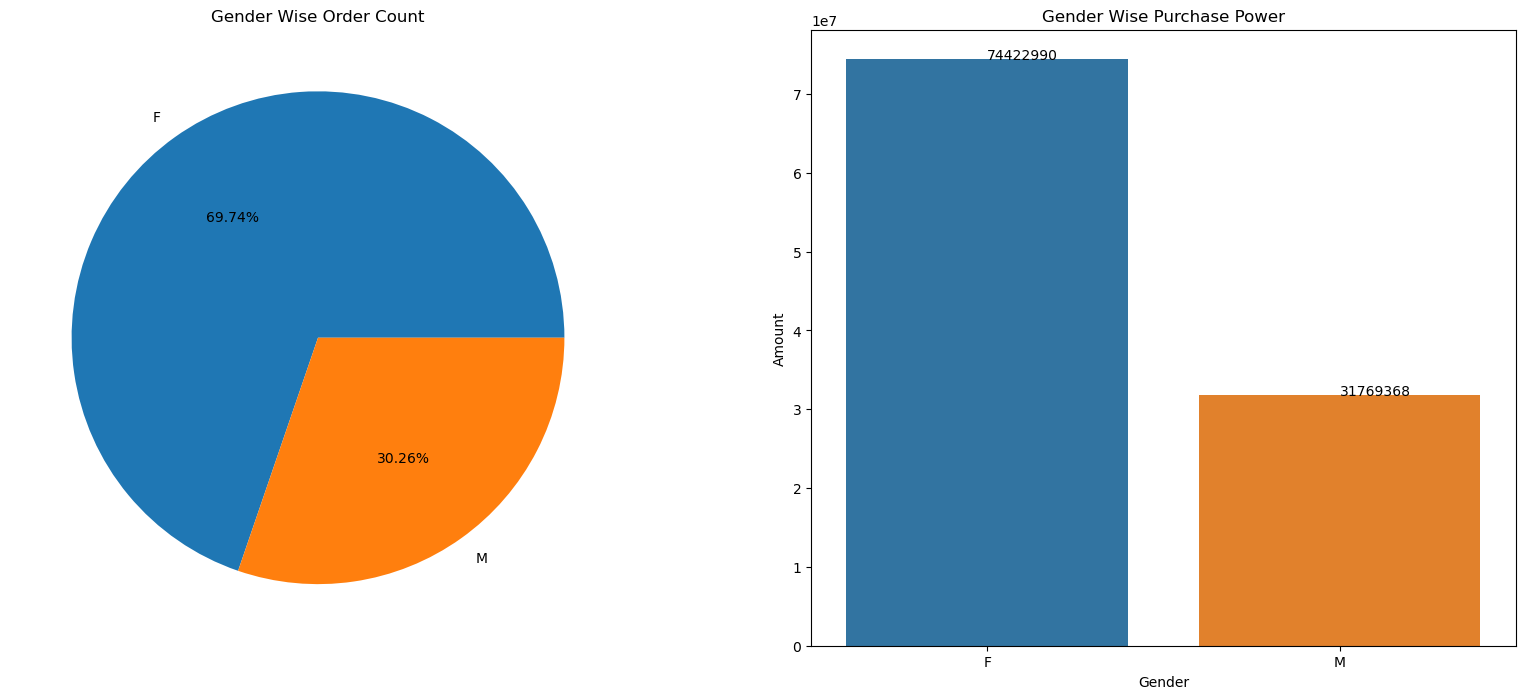

In [184]:
# Plotting
fig,ax = plt.subplots(1,2, figsize = (20,8))

# Pie Chart
ax[0].pie(x = data_gender_count['Orders'], 
           labels = data_gender_count['Gender'], autopct = "%1.2f%%")
ax[0].set_title("Gender Wise Order Count")

# Bar Chart
sns.barplot(x = 'Gender', y = 'Amount', data = data_gender_amount, ax = ax[1])
ax[1].set_title("Gender Wise Purchase Power")
for i in ax[1].patches:
    ax[1].annotate(f"{i.get_height():.0f}",(i.get_x()+i.get_width()/2.0,i.get_y()+i.get_height()))
plt.show()

### **Conclusion:**
Female Place more Order

### Maritial status Wise

In [186]:
# Plot data
data_marraige_status_amount = df.groupby(['marraige_status'], as_index = False)['Amount'].sum()
data_marraige_status_amount

,marraige_status,Amount
0,Married,44003938.00
1,Unmarried,62188419.94


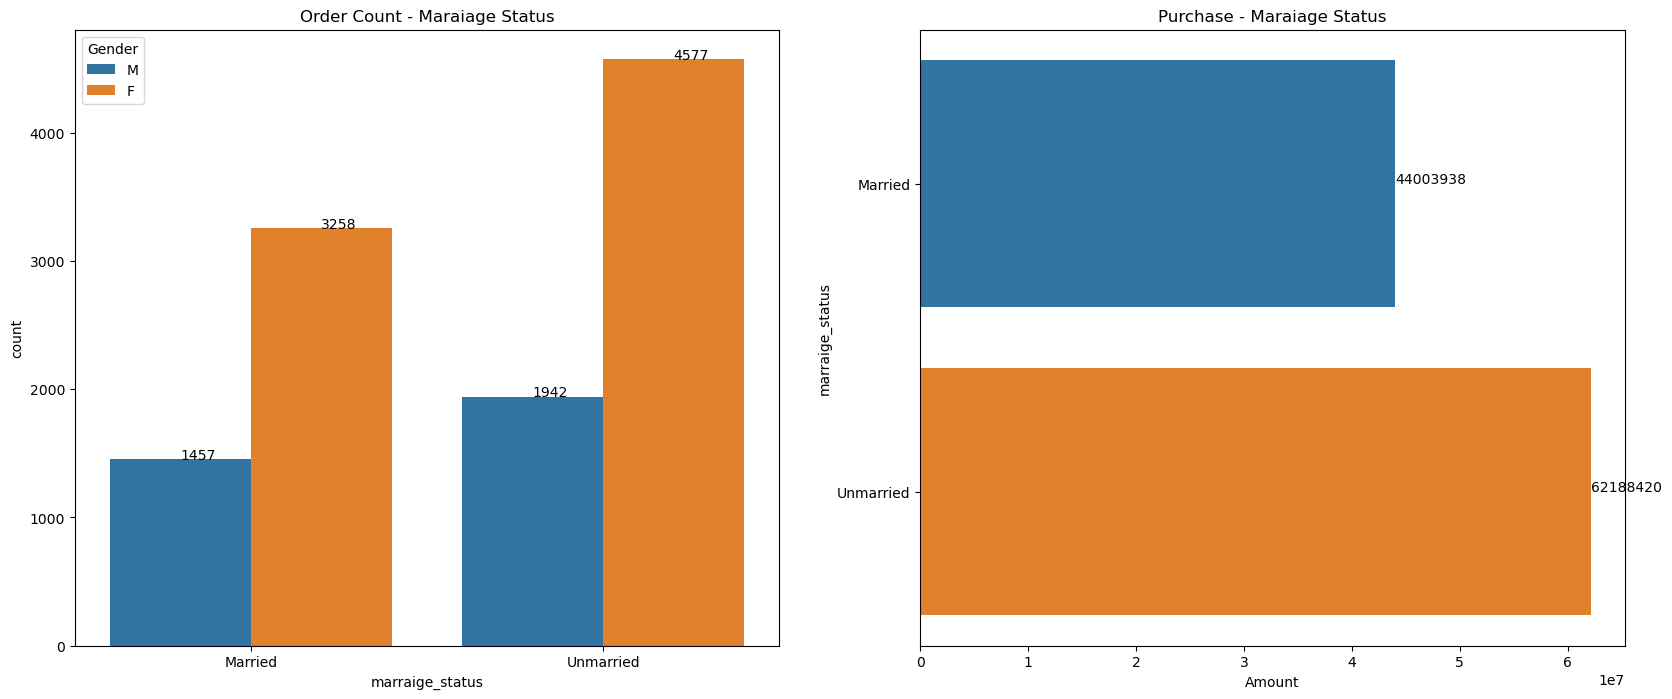

In [188]:
# Plots
fig, ax = plt.subplots(1,2, figsize = (20,8))

# Countplot
sns.countplot( x = 'marraige_status', hue = 'Gender', data = df, ax = ax[0])
ax[0].set_title('Order Count - Maraiage Status')

# Barplot for purchase power
sns.barplot(y = 'marraige_status', x = 'Amount', orient = 'h',
            data = data_marraige_status_amount, ax = ax[1])
ax[1].set_title('Purchase - Maraiage Status')
#Level bar-graph
for i in ax[0].patches:
    ax[0].annotate(f"{i.get_height():.0f}",(i.get_x()+i.get_width()/2.0,i.get_y()+i.get_height()))
for i in ax[1].patches:
    ax[1].annotate(f"{i.get_width():.0f}",(i.get_x()+i.get_width(),i.get_y()+i.get_height()/2.0))
plt.show()

### **Conclusion:**
Unmarried Place More order

In [190]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,State,Zone,Occupation,Product_Category,Orders,Amount,marraige_status
18,1001883.0,Praneet,P00029842,M,26-35,54.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married
19,1001883.0,Praneet,P00029842,M,26-35,54.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married


### Age Group

In [192]:
# Plot data
data_age_group_amount = df.groupby(['Age Group'], as_index = False)['Amount'].sum()
data_age_group_amount

,Age Group,Amount
0,0-17,2696529.00
1,18-25,17032196.00
2,26-35,42603794.95
3,36-45,22234332.99
4,46-50,9245595.00
5,51-55,8278320.00
6,55+,4101590.00


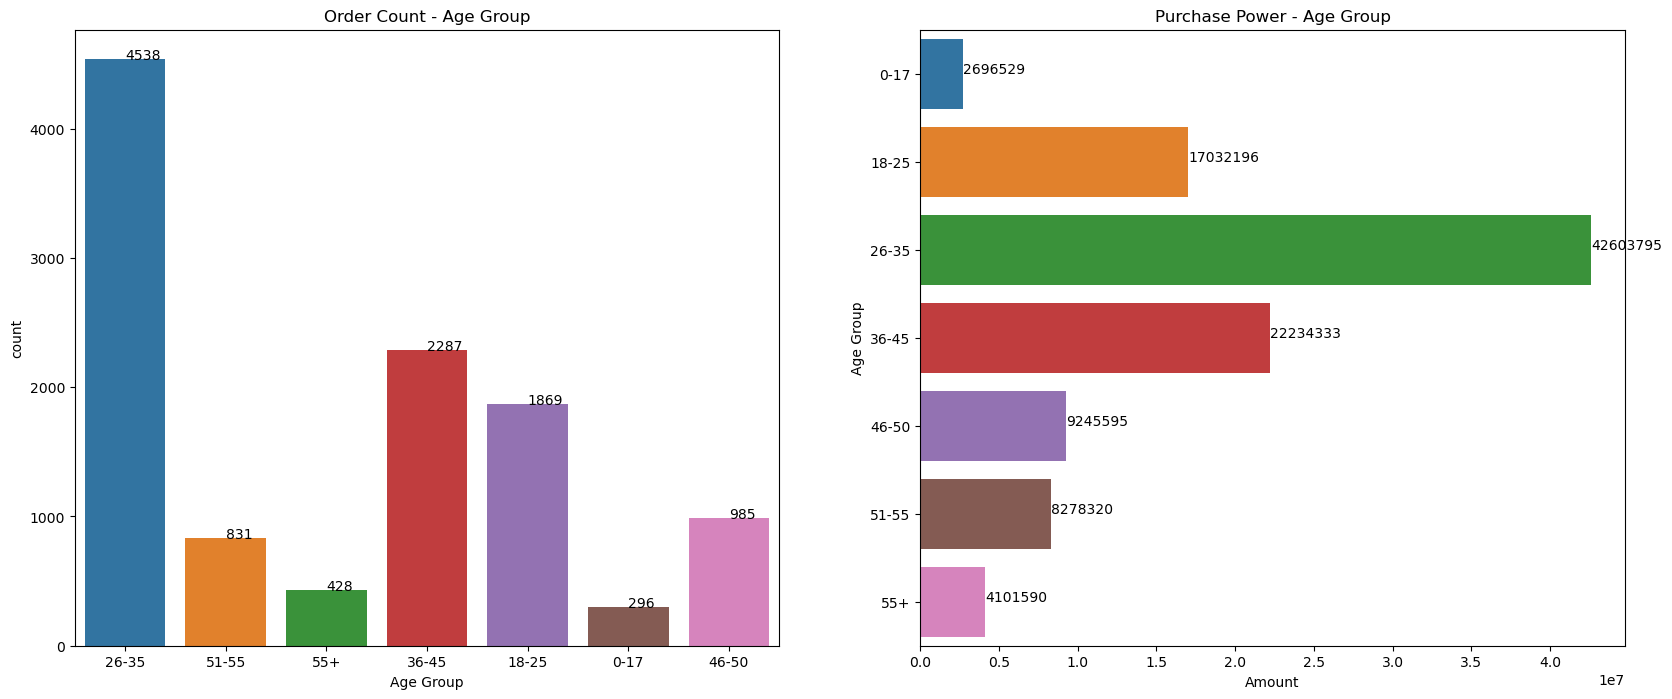

In [194]:
# Plots
fig, ax = plt.subplots(1,2, figsize = (20,8))

# Countplot
sns.countplot( x = 'Age Group', data = df, ax = ax[0])
ax[0].set_title('Order Count - Age Group')

# Barplot for purchase power
sns.barplot(y = 'Age Group', x = 'Amount', orient = 'h',
            data = data_age_group_amount, ax = ax[1])
ax[1].set_title('Purchase Power - Age Group')
for i in ax[0].patches:
    ax[0].annotate(f"{i.get_height():.0f}",(i.get_x()+i.get_width()/2.0,i.get_y()+i.get_height()))
for i in ax[1].patches:
    ax[1].annotate(f"{i.get_width():.0f}",(i.get_x()+i.get_width(),i.get_y()+i.get_height()/2.0))
plt.show()

### **Conclusion:**
26-35 Age group place more order 

#### Analysis Parameter
- Gender
- Maraige_Status
- Age Group
- Product_Category
- State
- Product_ID
- Occupation

In [196]:
a=df.columns
a

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'marraige_status'],
      dtype='object')

### Product_Category

In [198]:
# Plot data
data_product_category_amount = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
data_product_category_amount

,Product_Category,Amount
6,Food,33933883.50
3,Clothing & Apparel,16484472.00
7,Footwear & Shoes,16009057.45
5,Electronics & Gadgets,15607657.00
8,Furniture,5481325.99
9,Games & Toys,4331694.00
14,Sports Products,3635933.00
1,Beauty,1959484.00
0,Auto,1624503.00
11,Household items,1569337.00


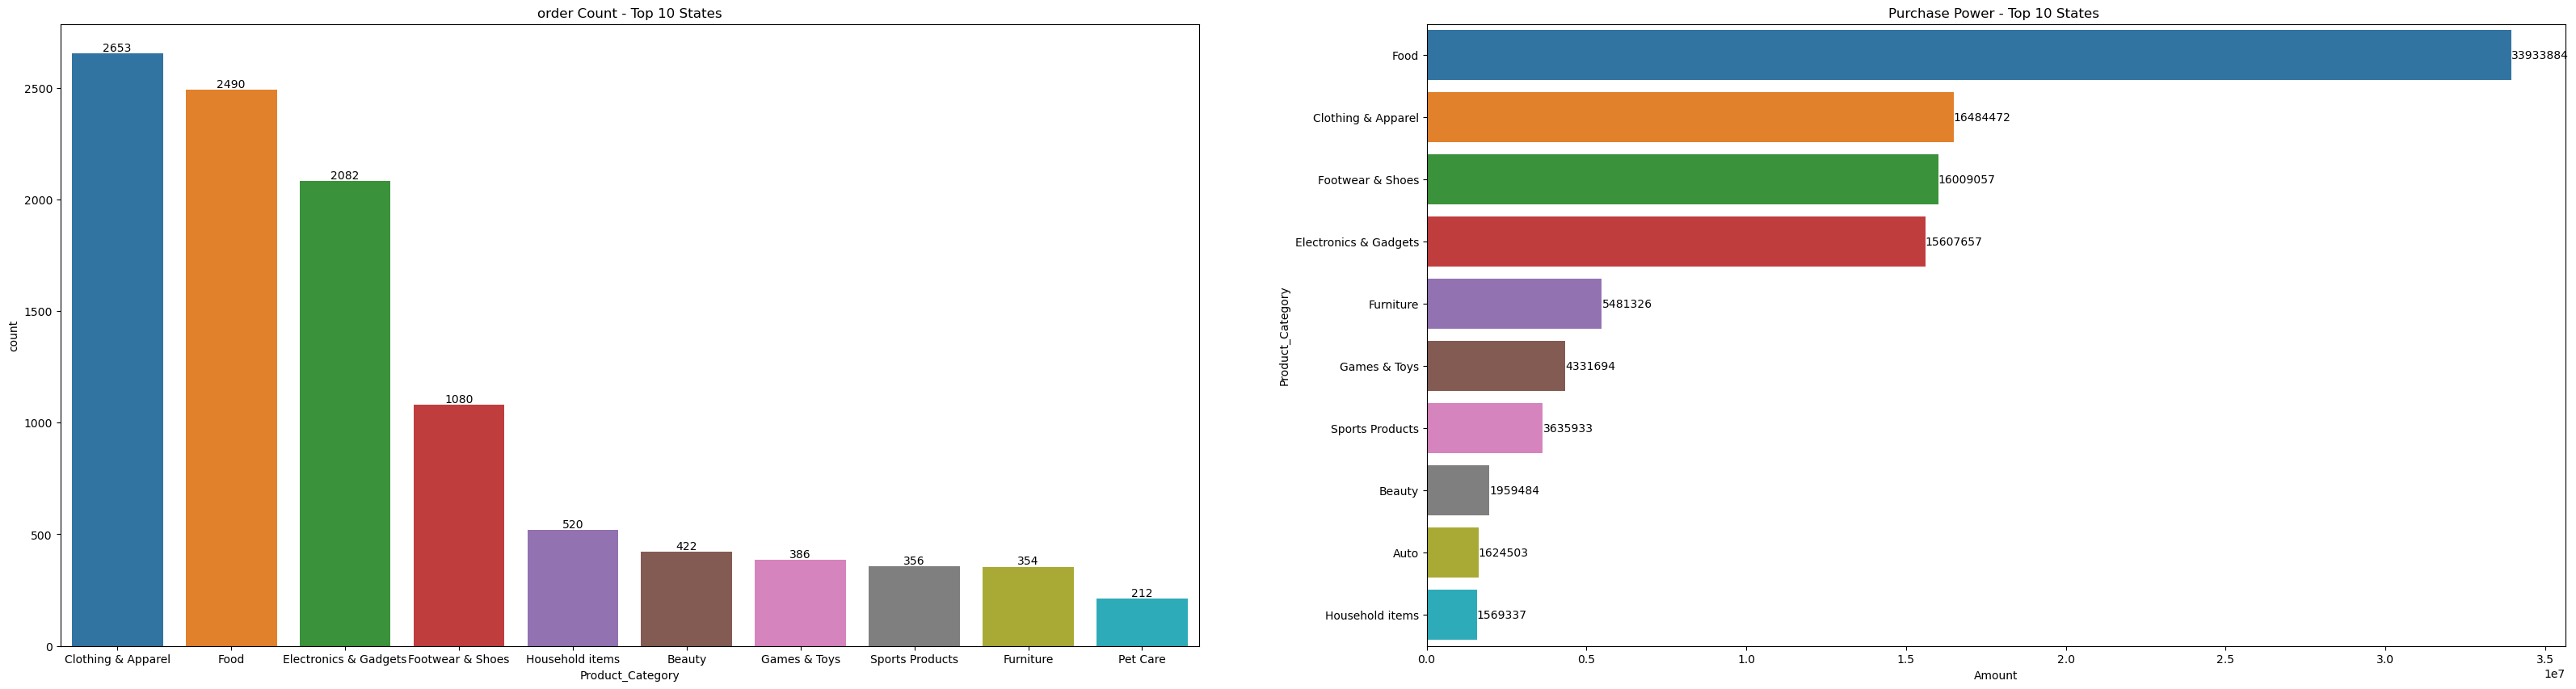

In [200]:
# Plots
fig,ax = plt.subplots(1,2, figsize = (40,10))
#countplot
sns.countplot(x = 'Product_Category',
              data = df, ax=ax[0],order=df['Product_Category'].value_counts('Product_Category').iloc[:10].index)
ax[0].set_title("order Count - Top 10 States")
#bar chart
sns.barplot(y = 'Product_Category', x = 'Amount', orient = 'h',
            data = data_product_category_amount, ax = ax[1])
ax[1].set_title("Purchase Power - Top 10 States ")

# Add level
for p in ax[0].patches:
    ax[0].annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

for p in ax[1].patches:
    ax[1].annotate(f"{p.get_width():.0f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                   ha='left', va='center')    
plt.show()

### **Conclusion:**
Cothing and Apparel are sell

### State Wise

In [202]:
# Plot data
data_state_amount = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
data_state_amount

,State,Amount
14,Uttar Pradesh,19360148.00
10,Maharashtra,14400762.00
7,Karnataka,13705829.00
2,Delhi,11554343.95
9,Madhya Pradesh,8100944.00
0,Andhra Pradesh,7894002.00
5,Himachal Pradesh,4939491.00
4,Haryana,4196308.00
1,Bihar,4035457.00
3,Gujarat,3935078.00


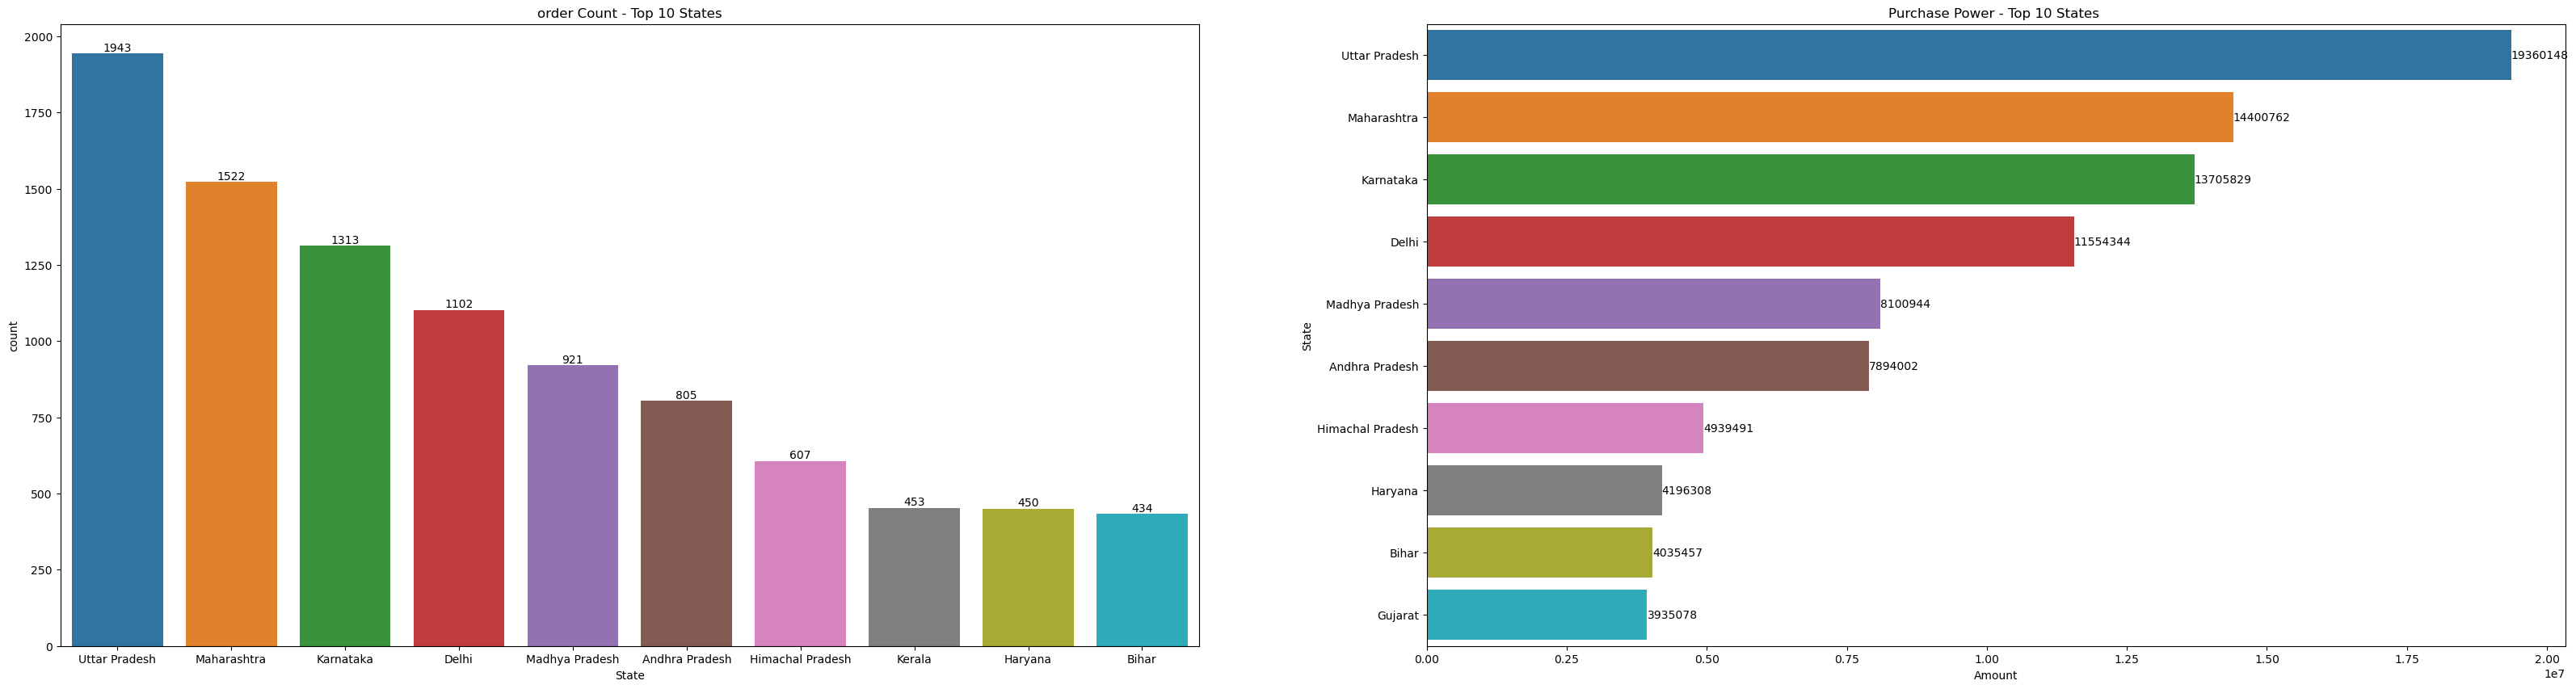

In [204]:
# Plots
fig,ax = plt.subplots(1,2, figsize = (40,10))
#countplot
sns.countplot(x = 'State',
              data = df, ax=ax[0],order=df['State'].value_counts('State').iloc[:10].index)
ax[0].set_title("order Count - Top 10 States")
#bar chart
sns.barplot(y = 'State', x = 'Amount', orient = 'h',
            data = data_state_amount, ax = ax[1])
ax[1].set_title("Purchase Power - Top 10 States ")
# Add level
for p in ax[0].patches:
    ax[0].annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

for p in ax[1].patches:
    ax[1].annotate(f"{p.get_width():.0f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                   ha='left', va='center')    
plt.show()

### **Conclusion:**
Uttar Pradesh Place more order

### Product_id wise

In [206]:
# Plot data
data_product_id_amount = df.groupby(['Product_ID'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
data_product_id_amount

,Product_ID,Amount
1678,P00265242,561461.0
1146,P00184942,401816.0
644,P00110942,400899.0
396,P00059442,359230.0
654,P00112142,341020.0
1503,P00237542,322363.0
388,P00058042,307040.0
642,P00110742,294548.0
643,P00110842,290661.0
313,P00046742,287643.0


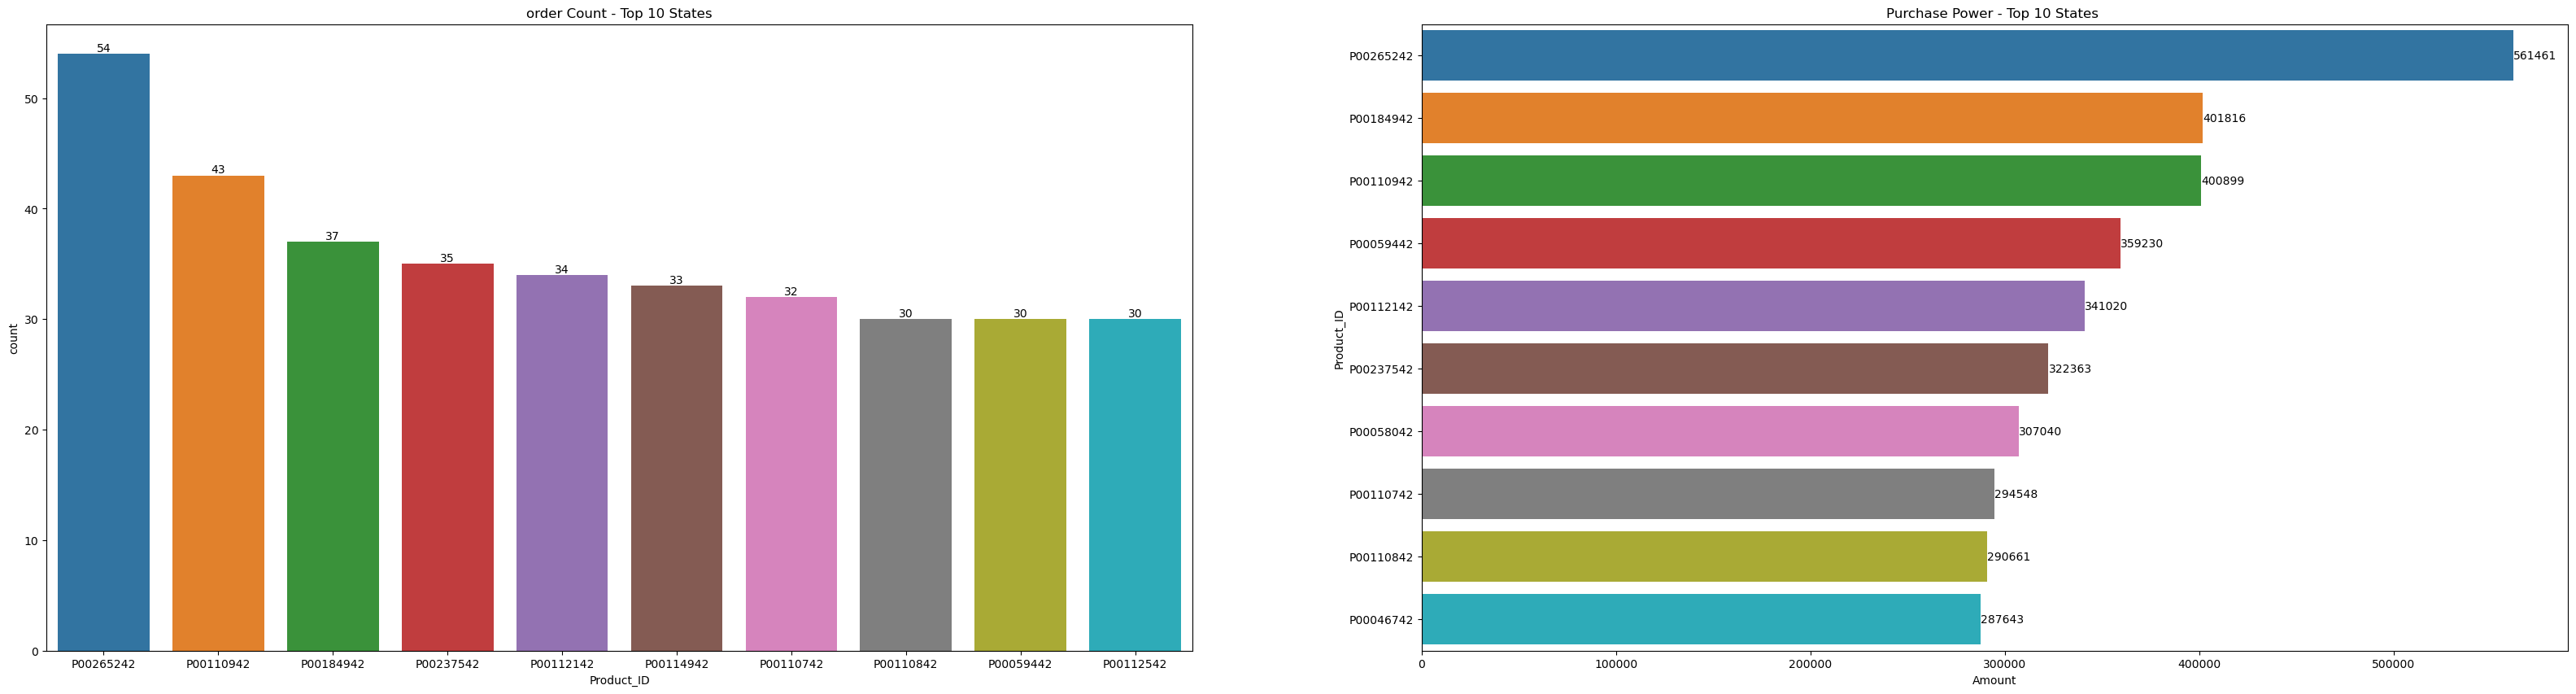

In [208]:
# Plots
#plots
fig,ax = plt.subplots(1,2, figsize = (40,10))
#countplot
sns.countplot(x = 'Product_ID',
              data = df, ax=ax[0],order=df['Product_ID'].value_counts('Product_ID').iloc[:10].index)
ax[0].set_title("order Count - Top 10 States")#bar chart
sns.barplot(y = 'Product_ID', x = 'Amount', orient = 'h',
            data = data_product_id_amount, ax = ax[1])
ax[1].set_title("Purchase Power - Top 10 States ")
# Add level
for p in ax[0].patches:
    ax[0].annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

for p in ax[1].patches:
    ax[1].annotate(f"{p.get_width():.0f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                   ha='left', va='center')    
plt.show()

### **Conclusion:**
Nothing 

### Occupation

In [210]:
# Plot data
data_occupation_amount = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
data_occupation_amount

,Occupation,Amount
10,IT Sector,14902488.00
8,Healthcare,12989061.49
2,Aviation,12596751.00
3,Banking,10767299.45
7,Govt,8425182.00
9,Hospitality,6402793.00
12,Media,6291535.00
1,Automobile,5362757.00
4,Chemical,5297100.00
11,Lawyer,4977574.00


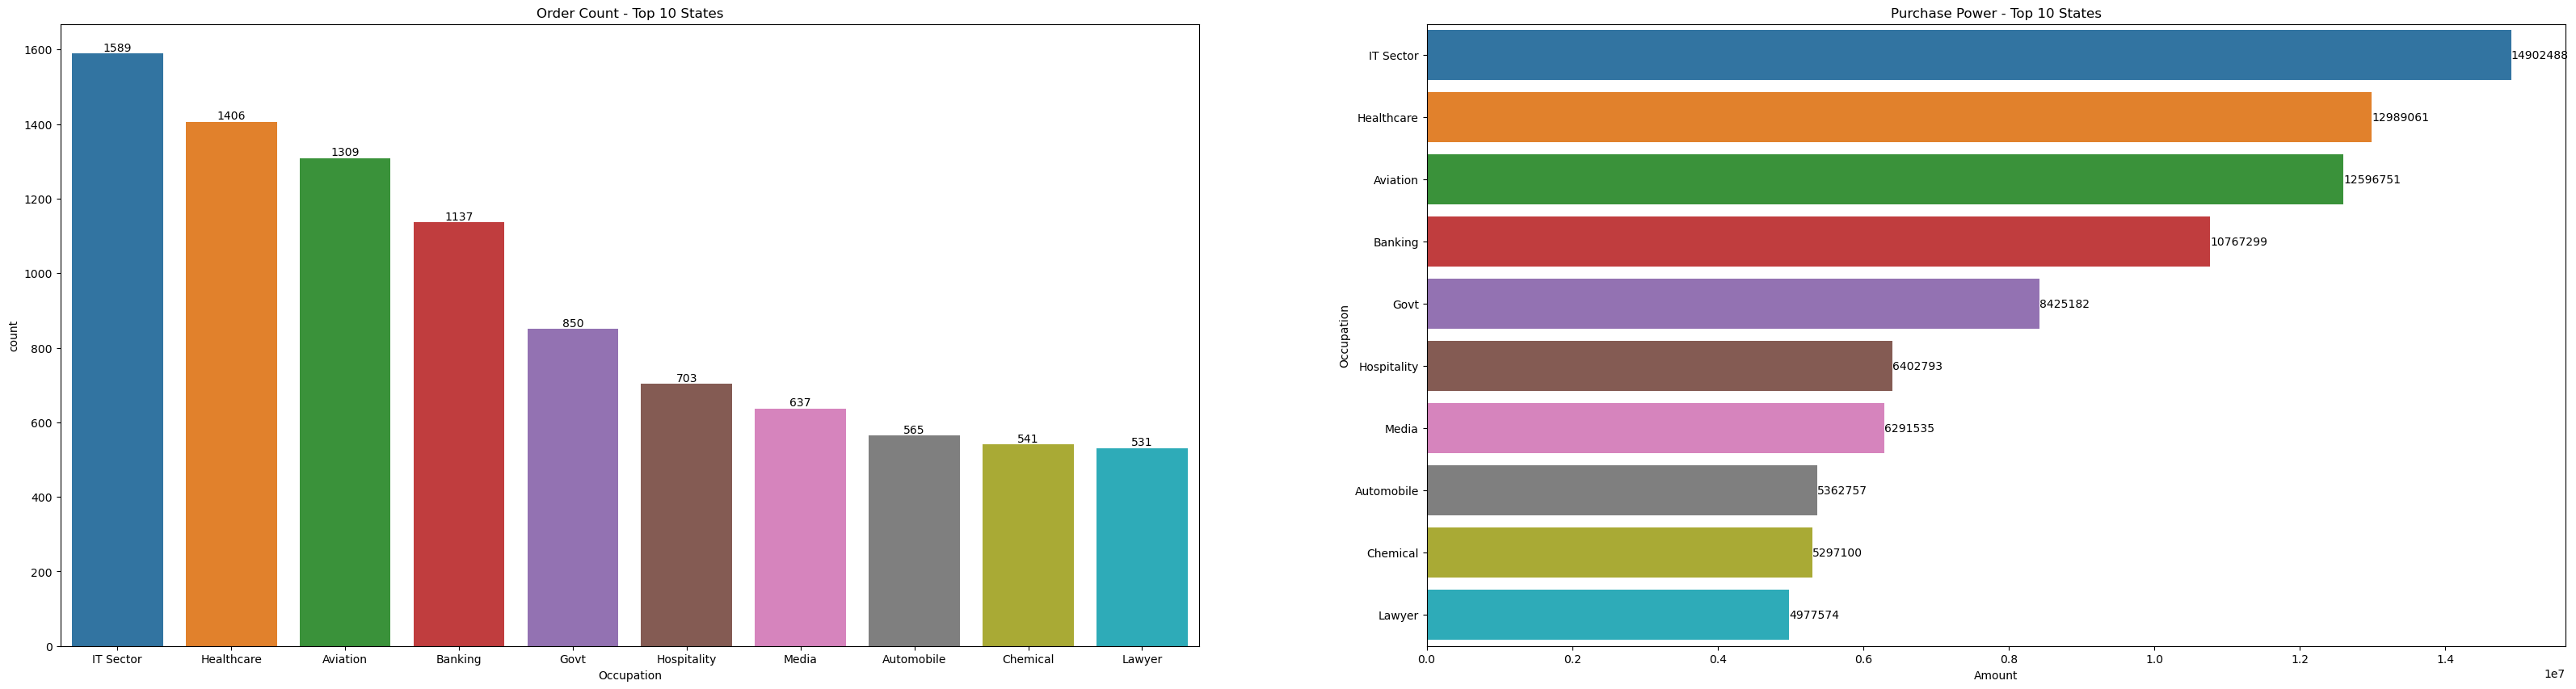

In [212]:
# Plots
fig, ax = plt.subplots(1, 2, figsize=(40, 10))

# Left plot: Countplot
sns.countplot(x='Occupation', data=df, ax=ax[0], order=df['Occupation'].value_counts().iloc[:10].index)
ax[0].set_title("Order Count - Top 10 States")
# Right plot: Bar chart
sns.barplot(y='Occupation', x='Amount', orient='h', data=data_occupation_amount, ax=ax[1])
ax[1].set_title("Purchase Power - Top 10 States")

# Add level
for p in ax[0].patches:
    ax[0].annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

for p in ax[1].patches:
    ax[1].annotate(f"{p.get_width():.0f}", (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                   ha='left', va='center')
plt.show()

### **Conclusion:**
IT sector Placed more order

### **Observation**

#### From Columns:
- Female Placed More order
- Unmarried Placed more order
- 26-35 age group placed more order
- Cothing and Apparel more sell
- Product_ID 
- Uttar Pradesh Placed more order
- IT Sector Placed more order